# Disney Stars' Success
By Anmol Sandhu, Lauren Armstrong

# Question
## What do the career trajectories of popular 2000s disney stars look like?

# Methodology

We start by looking at IMDb's Disney stars page. It contains a list of the top disney stars, links to their imdb pages and other information like the disney show they starred in and its IMDb link.   
All the scraping functions take parsed BeautifulSoup objects as input. We can use the `get_soup` function which requests the link and returns a BeautifulSoup object after parsing the html.   

Let's import the function which scrapes the main disney stars page and see what it outputs.

In [22]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from scraper_functions import *
from data_analysis import *

disney_soup = get_soup("https://www.imdb.com/list/ls056117732/")
print(all_links(disney_soup)[:3])

[('Debby Ryan', 'Insatiable', ['Comedy', 'Drama', 'Thriller'], 'https://www.imdb.com/name/nm2913275'), ('Peyton List', 'Diary of a Wimpy Kid: Dog Days', ['Comedy', 'Family'], 'https://www.imdb.com/name/nm2572554'), ('Cameron Boyce', 'Mrs. Fletcher', ['Comedy', 'Drama'], 'https://www.imdb.com/name/nm2624602')]


We only printed the first 3 actors in the list. Each actor is stored as a tuple in the list containing the actor's name, the disney show they were in, that disney show's genre and a link to their IMDb page.    
The next step is to go into each actor's IMDb page and get links to their movies. Let's look at the first few movies that the `celeb_movies` function scrapes from an actor's page.

In [23]:
celeb_soup = get_soup("https://www.imdb.com/name/nm2913275")

celeb_movies(celeb_soup)[:3]

['https://www.imdb.com/title/tt11897688/',
 'https://www.imdb.com/title/tt10763820/',
 'https://www.imdb.com/title/tt12114586/']

The function outputs links for all the movies the actor has done. The final step is to go into each movie's IMDb page and scrape information like it's name, genre, rating and box office collection. Below we can see the output `movie_info` function returns for a movie link passed to it. 

In [24]:
movie_soup = get_soup("https://www.imdb.com/title/tt12114586/")

movie_info(movie_soup)

('Twenty One Pilots: Level of Concern', '2020', None, ['Music'], '7.7')

Above we looked at the output for a few of one actor's movies and the description of one of their movies. The final step is to loop through all the actors on the disney page and collect information for each of their movies. We do this by running the `obtain_data.py` which collects all the data and saves it in the `imdb.json` file. We save it locally on our machine so that we don't have to wait to scrape the data every time we are trying to plot and analyze the data.  

Now we move forward to processing the data. We start by loading `imdb.json` as a dataframe so it is easier to process. Below we print out the first few columns of the dataframe to look at how it is structured. 

In [25]:
with open('imdb.json') as imdb_json:
    df = pd.DataFrame.from_dict(json.load(imdb_json), orient='index')
celebs = df.transpose()
print(celebs.columns[:5])

Index(['Debby Ryan, Insatiable, ['Comedy', 'Drama', 'Thriller']',
       'Peyton List, Diary of a Wimpy Kid: Dog Days, ['Comedy', 'Family']',
       'Cameron Boyce, Mrs. Fletcher, ['Comedy', 'Drama']',
       'Karan Brar, Diary of a Wimpy Kid, ['Comedy', 'Drama', 'Family']',
       'Skai Jackson, Arthur, ['Comedy', 'Romance']'],
      dtype='object')


The output shows actors as columns. We can print the first few rows of the first actor's columns to see how movie information is stored.

In [26]:
print(celebs.iloc[:3,1])

0    [The Friendship Game, None, None, [Sci-Fi], None]
1                [Shriver, 2022, None, [Comedy], None]
2    [Cobra Kai, 2018, None, [Action, Comedy, Drama...
Name: Peyton List, Diary of a Wimpy Kid: Dog Days, ['Comedy', 'Family'], dtype: object


The output shows that each actor has a separate column and the data for each of their movies is stored as a list in different rows.   

Now that we have the data stored in a dataframe, we can start filtering the data to create various plots. Let's try plotting the movie ratings over time for the first actor in the data. We use the function `movie_ratings_over_time` to filter the data into a dictionary and use `show_movie_ratings_over_time` to plot the data. Right now we will copy `show_movie_ratings_over_time` here and slightly modify it so that it shows the plot output inline instead of saving it in a folder.

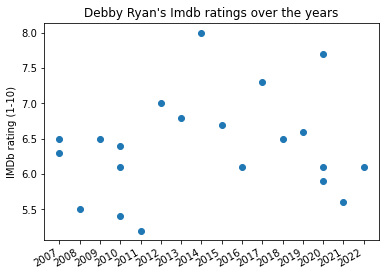

In [27]:
movie_year, celeb, num = movie_ratings_over_time(celebs,0)
for year in movie_year:
        for rating in movie_year[year]:
            plt.scatter(year, rating, c=['#1f77b4'])

plt.xticks(rotation=30, ha='right')
plt.title(
    f"{celeb.columns[num].split(',')[0]}'s Imdb ratings over the years")
plt.ylabel("IMDb rating (1-10)")
plt.show()

The output creates a scatter plot which can help find trends in the IMDb ratings over an actor's career.   
We can use the function `do_for_all` which takes a data filtering function and a data plotting function for one actor as input and performs it on all the actors in the data. Running `data_analysis.py` uses the `do_for_all` function on all the data analysis functions we have created and saves the output in separate folders. 